In [70]:
import pandas as pd 
import numpy as np

In [71]:
train = pd.read_csv('train.csv',low_memory=False)

In [3]:
train.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,48,meale,1,2,1,1,2,2,1,2,1,1,1,4.80,123,157,2.7,31,2,DIE
1,51,Male,2,2,1,2,2,2,1,1,1,2,1,1.00,?,20,3.0,63,2,LIVE
2,40,m,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1,LIVE
3,25,m,2,2,1,2,2,1,1,1,1,1,1,1.30,181,181,4.5,57,2,LIVE
4,34,M,1,2,1,2,2,1,1,2,1,2,2,1.00,72,46,4.4,57,1,LIVE


In [4]:
train.isna().sum()

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
Class              0
dtype: int64

In [5]:
train.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY', 'Class'],
      dtype='object')

In [6]:
to_clean = train.copy()

In [7]:
to_clean.SEX.value_counts()

m         20
meale     18
Male      15
M         13
maled     13
male      13
F          4
Feamle     4
female     2
Name: SEX, dtype: int64

In [8]:
to_clean['SEX'] = train.SEX.apply(lambda x: '0' if x[0].lower() == 'm' else 1)

In [9]:
to_clean

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,48,0,1,2,1,1,2,2,1,2,1,1,1,4.80,123,157,2.7,31,2,DIE
1,51,0,2,2,1,2,2,2,1,1,1,2,1,1.00,?,20,3.0,63,2,LIVE
2,40,0,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1,LIVE
3,25,0,2,2,1,2,2,1,1,1,1,1,1,1.30,181,181,4.5,57,2,LIVE
4,34,0,1,2,1,2,2,1,1,2,1,2,2,1.00,72,46,4.4,57,1,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23,0,2,2,1,1,1,2,2,1,2,2,2,1.30,194,150,4.1,90,1,LIVE
98,38,0,1,2,2,2,2,2,1,2,2,2,2,0.40,243,49,3.8,90,2,DIE
99,36,0,1,2,2,2,2,2,2,1,2,2,2,0.80,85,44,4.2,85,1,LIVE
100,32,0,1,1,1,1,2,2,2,2,2,2,2,1.00,55,45,4.1,56,1,LIVE


In [10]:
for col in to_clean.columns:
    to_clean[col] = to_clean[col].apply(lambda x: float("nan") if x == '?' else x)

In [11]:
def filter_nans(df, threshold = 0.3):
    to_clean = df.copy()
    nulls_percent_nan = pd.DataFrame(to_clean.isna().sum()/len(to_clean)).reset_index()
    nulls_percent_nan.columns = ['column_name', 'nulls_percentage']
    columns_filtered = nulls_percent_nan[nulls_percent_nan.nulls_percentage < threshold]['column_name'].values
    columns_removed = nulls_percent_nan[nulls_percent_nan.nulls_percentage > threshold]['column_name'].values
    return to_clean[columns_filtered], columns_removed

In [12]:
train_filter, columns_removed = filter_nans(to_clean, threshold = 0.3)

In [13]:
columns_removed

array(['PROTIME'], dtype=object)

In [14]:
train_filter.isna().sum()

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           6
LIVER FIRM          7
SPLEEN PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN           3
ALK PHOSPHATE      18
SGOT                3
ALBUMIN             9
HISTOLOGY           0
Class               0
dtype: int64

In [15]:
train_filter[train_filter['ALK PHOSPHATE'].isnull()]

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
1,51,0,2,2,1,2,2,2,1,1,1,2,1,1.00,NaN,20,3.0,2,LIVE
13,31,0,1,2,1,1,1,2,2,1,2,2,2,8.00,NaN,101,2.2,2,DIE
29,51,0,2,2,2,2,2,1,1,2,1,2,2,0.80,NaN,33,4.5,2,LIVE
36,42,0,1,2,1,1,1,2,2,1,1,2,1,4.60,NaN,55,3.3,2,DIE
39,34,0,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,1,LIVE
49,46,0,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,2,DIE
51,24,0,1,2,1,2,2,2,2,2,2,2,2,1.00,NaN,34,4.1,2,LIVE
53,23,0,2,2,1,1,1,2,2,2,2,2,2,0.80,NaN,14,4.8,1,LIVE
59,61,0,1,2,1,1,2,NaN,NaN,2,1,2,2,NaN,NaN,NaN,NaN,2,DIE
60,52,0,1,2,2,2,2,2,2,2,2,2,2,1.50,NaN,69,2.9,2,LIVE


In [16]:
def clean_rows(df, min_nans=4):
    train_filter = df.copy()
    train_filter = train_filter[train_filter.isna().sum(axis=1) < 4]
    return train_filter

In [17]:
train_filter2 = clean_rows(train_filter, 1)
train_filter2.shape

(97, 19)

In [18]:
train_filter2.isna().sum()

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           3
LIVER FIRM          4
SPLEEN PALPABLE     0
SPIDERS             0
ASCITES             0
VARICES             0
BILIRUBIN           1
ALK PHOSPHATE      16
SGOT                1
ALBUMIN             7
HISTOLOGY           0
Class               0
dtype: int64

In [19]:
from sklearn.impute import KNNImputer

In [20]:
X = train_filter2.drop(columns = 'Class')
y = train_filter2[['Class']]
print(X.shape)
imputer = KNNImputer(n_neighbors=5)
X_imp = imputer.fit_transform(X)
print(X_imp.shape)

(97, 18)
(97, 18)


In [21]:
pd.DataFrame(X_imp, columns = X.columns, index = X.index)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,48.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,2.0
1,51.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,84.6,20.0,3.0,2.0
2,40.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.6,62.0,166.0,4.0,1.0
3,25.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.3,181.0,181.0,4.5,2.0
4,34.0,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,72.0,46.0,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.3,194.0,150.0,4.1,1.0
98,38.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.4,243.0,49.0,3.8,2.0
99,36.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,1.0
100,32.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,55.0,45.0,4.1,1.0


In [126]:
from sklearn.impute import KNNImputer

def filter_nans_percentaje(df, threshold = 0.3):
    to_clean = df.copy()
    nulls_percent_nan = pd.DataFrame(to_clean.isna().sum()/len(to_clean)).reset_index()
    nulls_percent_nan.columns = ['column_name', 'nulls_percentage']
    columns_filtered = nulls_percent_nan[nulls_percent_nan.nulls_percentage < threshold]['column_name'].values
    return to_clean[columns_filtered]

def filter_nans_rows(df, min_nans=4):
    train_filter = df.copy()
    train_filter = train_filter[train_filter.isna().sum(axis=1) < 4]
    return train_filter


def clean_X(df, threshold = 0.3, min_nans_row=4):
    '''
    This function cleans the dataframe X
    
    Inputs:
    df -> the dataframe
    threshold -> above this percentaje of nans columns are removed
    min_nans_row -> above this num of nans in a row the row is removed
    
    Output:
    X clean   
    '''
    
    to_clean = df.copy()
    
    for col in to_clean.columns:
        to_clean[col] = to_clean[col].apply(lambda x: float("nan") if x == '?' else x)
    
    to_clean['SEX'] = to_clean.SEX.apply(lambda x: '0' if x[0].lower() == 'm' else 1)
    
    to_clean = filter_nans_percentaje(to_clean, threshold)
    
    to_clean = filter_nans_rows(to_clean, min_nans_row)
    
    
    imputer = KNNImputer(n_neighbors=10)
    X_imp = imputer.fit_transform(to_clean)
    
    
    
    X_clean = pd.DataFrame(X_imp, columns = to_clean.columns, index = to_clean.index)
    
    return X_clean

In [127]:
X_train = train.drop(columns = 'Class')
y_train = train[['Class']]
X_train_clean = clean_X(X_train, 1, 4)
y_train_clean = y_train[y_train.index.isin(X_train_clean.index)]

In [128]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_clean, y_train_clean)

In [129]:
y_train_SMOTE.head(4)

,Class
0,DIE
1,LIVE
2,LIVE
3,LIVE


In [175]:
# Train-Test
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=42)

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

logreg_model = LogisticRegression(max_iter = 2000)
tree_model   = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

import numpy as np
model_pipeline = [logreg_model, tree_model, random_forest]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest']
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train2, np.ravel(y_train2), cv=5))
    scores[model_name] = mean_score
print(scores)

{'Logistic Regression': 0.925, 'Decision Tree Classifier': 0.8833333333333334, 'Random Forest': 0.9416666666666668}


Random forest is the beast

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score, greater_is_better=True)


grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid={'max_depth': [1, 10, 100],
                                'max_samples': [0.5, 0.8, 1, 5, 10],
                                'n_estimators': [50,100,200,300],
                                'min_samples_split': [10,30],        
                                'min_samples_leaf': [20]}, 
                    scoring=kappa_scorer)

In [178]:
# grid.fit(X_train2, np.ravel(y_train2))
# grid.best_params_

<ipython-input-179-80ac6e066c7d>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train2, y_train2)


Class
DIE      15
LIVE     15
dtype: int64

The Kappa for the Random Forest in the CROSS-VAL  set is 0.87


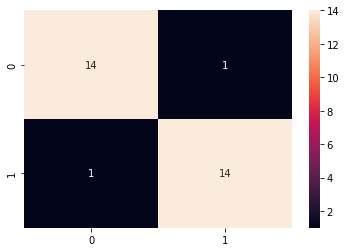

The Kappa for the Random Forest in the TRAIN set is 0.88


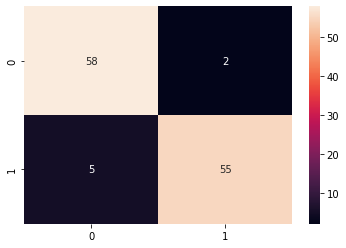

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

clf = RandomForestClassifier(max_depth=1, 
                             max_samples=0.8,
                             min_samples_leaf=20,
                             min_samples_split=10,
                             n_estimators = 50,
                             random_state=42)

clf.fit(X_train2, y_train2)


y_pred = clf.predict(X_val)
display(y_val.value_counts())


print("The Kappa for the Random Forest in the CROSS-VAL  set is {:.2f}".format(cohen_kappa_score(y_val, np.ravel(y_pred))))
conf = confusion_matrix(y_val, y_pred)
sn.heatmap(conf, annot=True)
plt.show()

print("The Kappa for the Random Forest in the TRAIN set is {:.2f}".format(cohen_kappa_score(y_train2, np.ravel(clf.predict(X_train2)))))
conf2 = confusion_matrix(y_train2, np.ravel(clf.predict(X_train2)))
sn.heatmap(conf2, annot=True)
plt.show()



In [180]:
import pickle
pickle.dump(clf, open( "model.p", "wb" ) )

In [181]:
from sklearn.impute import KNNImputer

def clean_X(df):
    '''
    This function cleans the dataframe X
    
    Inputs:
    df -> the dataframe
    threshold -> above this percentaje of nans columns are removed
    min_nans_row -> above this num of nans in a row the row is removed
    
    Output:
    X clean   
    '''
    
    to_clean = df.copy()
    
    for col in to_clean.columns:
        to_clean[col] = to_clean[col].apply(lambda x: float("nan") if x == '?' else x)
    
    to_clean['SEX'] = to_clean.SEX.apply(lambda x: '0' if x[0].lower() == 'm' else 1)
    
    imputer = KNNImputer(n_neighbors=5)
    X_imp = imputer.fit_transform(to_clean)
    
    X_clean = pd.DataFrame(X_imp, columns = to_clean.columns, index = to_clean.index)
    
    return X_clean

# whole function:
def live_or_die(df):
    '''
    This functions determines if a group of patients will die or live depending on their medical history
    '''    
    df_2 = df.copy()
    
    X_clean = clean_X(df_2)
    
    clf = pickle.load(open( "model.p", "rb" ))
    
    y_pred = clf.predict(X_clean)
    
    return y_pred

Now we test it with the test set...

In [182]:
test = pd.read_csv('test_no_class.csv',low_memory=False)

In [183]:
y = live_or_die(test)
y.shape

(53,)

In [184]:
pd.DataFrame(y).to_csv('predictions.csv')

In [185]:
y

array(['LIVE', 'LIVE', 'LIVE', 'LIVE', 'LIVE', 'LIVE', 'LIVE', 'LIVE',
       'DIE', 'LIVE', 'LIVE', 'LIVE', 'LIVE', 'DIE', 'LIVE', 'LIVE',
       'LIVE', 'LIVE', 'DIE', 'DIE', 'LIVE', 'LIVE', 'LIVE', 'LIVE',
       'LIVE', 'LIVE', 'DIE', 'LIVE', 'DIE', 'LIVE', 'DIE', 'LIVE',
       'LIVE', 'LIVE', 'DIE', 'LIVE', 'DIE', 'DIE', 'DIE', 'DIE', 'DIE',
       'DIE', 'LIVE', 'DIE', 'LIVE', 'DIE', 'DIE', 'LIVE', 'LIVE', 'LIVE',
       'LIVE', 'LIVE', 'LIVE'], dtype=object)